In [ ]:
#cargamos libreir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Carga desde un archivo .csv sin indice
data = pd.read_csv('df_Valencia_limpio_50cols.csv')

#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9009 non-null   float64
 1   host_id                                       9009 non-null   int64  
 2   neighbourhood                                 9009 non-null   object 
 3   neighbourhood_cleansed                        9009 non-null   object 
 4   neighbourhood_group_cleansed                  9009 non-null   object 
 5   latitude                                      9009 non-null   float64
 6   longitude                                     9009 non-null   float64
 7   property_type                                 9009 non-null   object 
 8   room_type                                     9009 non-null   object 
 9   accommodates                                  9009 non-null   i

In [ ]:
#Corroboramos valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

,0
id,0
host_id,0
neighbourhood,0
neighbourhood_cleansed,0
neighbourhood_group_cleansed,0
latitude,0
longitude,0
property_type,0
room_type,0
accommodates,0


In [ ]:
data1 = data.copy()

In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos = data1.isnull().sum()
valores_nulos

,0
id,0
host_id,0
neighbourhood,0
neighbourhood_cleansed,0
neighbourhood_group_cleansed,0
latitude,0
longitude,0
property_type,0
room_type,0
accommodates,0


In [27]:
#Crear 2 dataframe para poder procesar los outliers
cualitativas  = data1.iloc[:, [0]]
cuantitativas = data1.select_dtypes(include=[np.number]).copy()

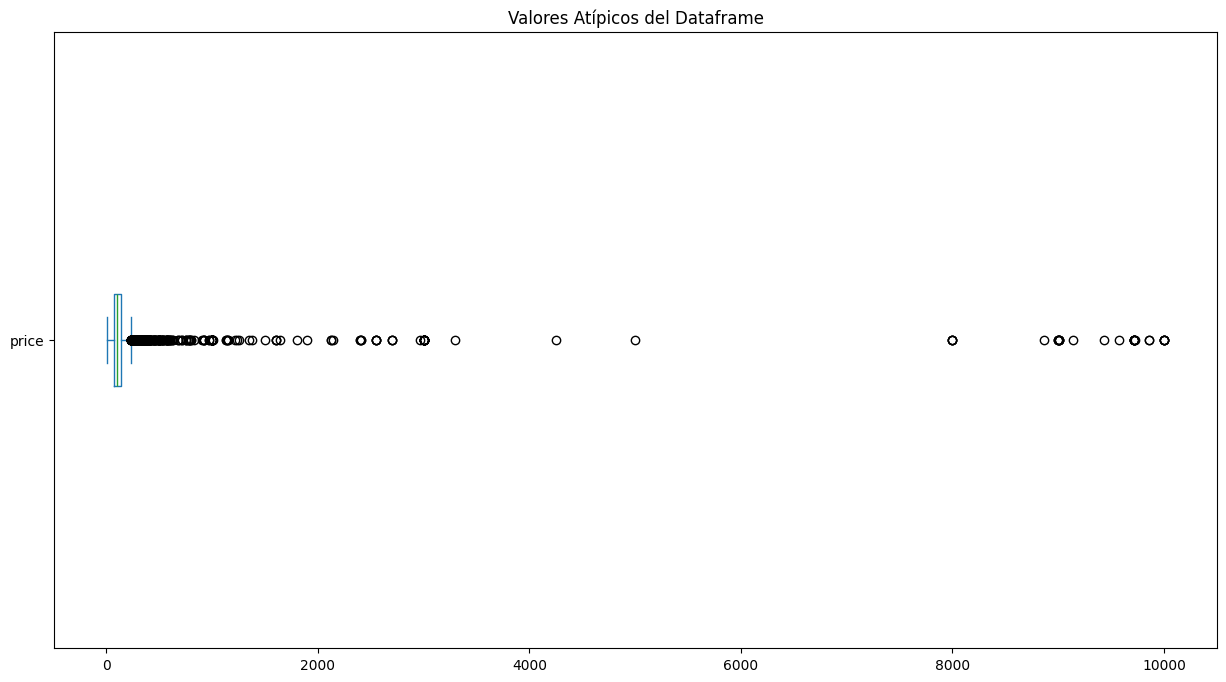

In [28]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe (ejemplo: 'price')
fig = plt.figure(figsize =(15, 8))
cuantitativas['price'].plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              3.121950e+18
host_id                                         1.153436e+09
latitude                                        3.949524e+01
longitude                                      -2.917550e-01
accommodates                                    7.000000e+00
bathrooms                                       1.000000e+00
bedrooms                                        3.500000e+00
beds                                            6.000000e+00
price                                           2.345000e+02
minimum_nights                                  1.100000e+01
maximum_nights                                  7.775000e+02
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          2.200000e+01
minimum_maximum_nights                          2.766000e+03
maximum_maximum_nights                          2.542500e+03
minimum_nights_avg_ntm                          1.725000e+0

In [ ]:
#Obtenemos datos limpios del Dataframe (outliers -> NaN)
data3_iqr = cuantitativas[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data3_iqr

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,4.815400e+04,219476,39.48375,-0.37502,4.0,1.0,2.0,2.0,83.0,3.0,...,4.67,4.63,4.85,4.80,4.51,4.51,4.0,4.0,0.0,0.0
1,1.371430e+05,670775,NaN,-0.31932,7.0,NaN,1.0,NaN,NaN,10.0,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,1.497150e+05,5947,39.46746,-0.32813,NaN,NaN,NaN,NaN,NaN,2.0,...,4.71,4.57,4.85,4.89,4.62,4.62,1.0,1.0,0.0,0.0
3,1.659710e+05,791187,39.46790,-0.38206,4.0,1.0,1.0,1.0,109.0,5.0,...,4.91,4.88,4.89,4.88,4.84,4.85,7.0,7.0,0.0,0.0
4,1.822210e+05,1315567,39.46343,-0.34325,5.0,1.0,2.0,5.0,NaN,3.0,...,4.44,4.44,4.67,4.67,4.33,4.44,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,1.446830e+18,699842757,39.47113,-0.33532,1.0,1.0,1.0,1.0,48.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0
9005,1.446970e+18,16315439,39.44232,-0.33676,NaN,NaN,3.0,4.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0
9006,1.446980e+18,667243536,39.46189,-0.34709,4.0,NaN,2.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0
9007,1.447000e+18,514226051,39.45983,-0.38760,5.0,NaN,2.0,2.0,131.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,0.0,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

,0
id,0
host_id,0
latitude,357
longitude,44
accommodates,356
bathrooms,2379
bedrooms,397
beds,107
price,585
minimum_nights,993


In [31]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,4.815400e+04,219476,39.48375,-0.37502,4.0,1.0,2.0,2.0,83.0,3.0,...,4.67,4.63,4.85,4.80,4.51,4.51,4.0,4.0,0.0,0.0
1,1.371430e+05,670775,39.50000,-0.31932,7.0,1.0,1.0,2.1,101.4,10.0,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,1.497150e+05,5947,39.46746,-0.32813,3.3,1.0,1.4,2.1,101.4,2.0,...,4.71,4.57,4.85,4.89,4.62,4.62,1.0,1.0,0.0,0.0
3,1.659710e+05,791187,39.46790,-0.38206,4.0,1.0,1.0,1.0,109.0,5.0,...,4.91,4.88,4.89,4.88,4.84,4.85,7.0,7.0,0.0,0.0
4,1.822210e+05,1315567,39.46343,-0.34325,5.0,1.0,2.0,5.0,101.4,3.0,...,4.44,4.44,4.67,4.67,4.33,4.44,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,1.446830e+18,699842757,39.47113,-0.33532,1.0,1.0,1.0,1.0,48.0,1.0,...,4.80,4.70,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0
9005,1.446970e+18,16315439,39.44232,-0.33676,3.3,1.0,3.0,4.0,101.4,3.0,...,4.80,4.70,4.80,4.80,4.70,4.60,1.0,1.0,0.0,0.0
9006,1.446980e+18,667243536,39.46189,-0.34709,4.0,1.0,2.0,2.0,101.4,1.0,...,4.80,4.70,4.80,4.80,4.70,4.60,1.0,1.0,0.0,0.0
9007,1.447000e+18,514226051,39.45983,-0.38760,5.0,1.0,2.0,2.0,131.0,11.0,...,4.80,4.70,4.80,4.80,4.70,4.60,13.0,13.0,0.0,0.0


In [32]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,id,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,4.815400e+04,4.815400e+04,219476,39.48375,-0.37502,4.0,1.0,2.0,2.0,83.0,...,4.67,4.63,4.85,4.80,4.51,4.51,4.0,4.0,0.0,0.0
1,1.371430e+05,1.371430e+05,670775,39.50000,-0.31932,7.0,1.0,1.0,2.1,101.4,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,1.497150e+05,1.497150e+05,5947,39.46746,-0.32813,3.3,1.0,1.4,2.1,101.4,...,4.71,4.57,4.85,4.89,4.62,4.62,1.0,1.0,0.0,0.0
3,1.659710e+05,1.659710e+05,791187,39.46790,-0.38206,4.0,1.0,1.0,1.0,109.0,...,4.91,4.88,4.89,4.88,4.84,4.85,7.0,7.0,0.0,0.0
4,1.822210e+05,1.822210e+05,1315567,39.46343,-0.34325,5.0,1.0,2.0,5.0,101.4,...,4.44,4.44,4.67,4.67,4.33,4.44,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,1.446830e+18,1.446830e+18,699842757,39.47113,-0.33532,1.0,1.0,1.0,1.0,48.0,...,4.80,4.70,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0
9005,1.446970e+18,1.446970e+18,16315439,39.44232,-0.33676,3.3,1.0,3.0,4.0,101.4,...,4.80,4.70,4.80,4.80,4.70,4.60,1.0,1.0,0.0,0.0
9006,1.446980e+18,1.446980e+18,667243536,39.46189,-0.34709,4.0,1.0,2.0,2.0,101.4,...,4.80,4.70,4.80,4.80,4.70,4.60,1.0,1.0,0.0,0.0
9007,1.447000e+18,1.447000e+18,514226051,39.45983,-0.38760,5.0,1.0,2.0,2.0,131.0,...,4.80,4.70,4.80,4.80,4.70,4.60,13.0,13.0,0.0,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos

,0
id,0
id,0
host_id,0
latitude,0
longitude,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0


In [23]:
# Guardar CSV del método IQR
Datos_limpios.to_csv("valencia_IQR_imputado.csv", index=False)

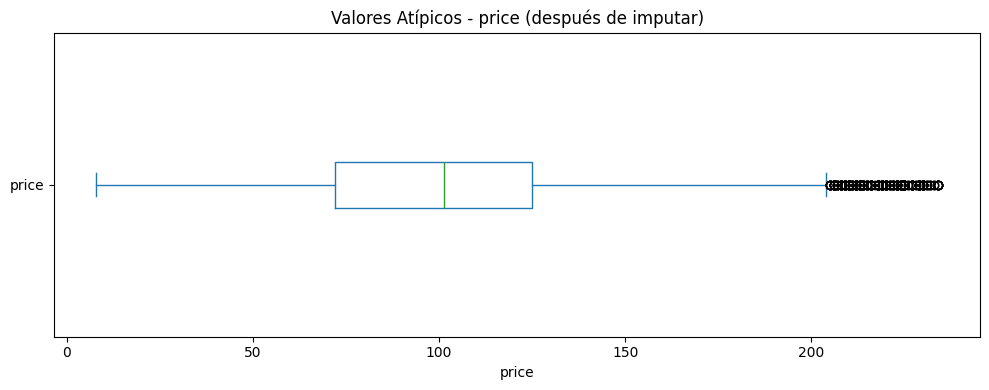

In [35]:
# Cargar el archivo ya limpio por IQR (imputado)
df = pd.read_csv("valencia_IQR_imputado.csv")

# Si quieres otra columna, cambia 'price'
col = "price"

plt.figure(figsize=(10, 4))
df[col].plot(kind="box", vert=False)
plt.title(f"Valores Atípicos - {col} (después de imputar)")
plt.xlabel(col)
plt.tight_layout()
